In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('../data/data.csv')
display(data)

,Day,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Class
0,0,0.174300,0.438155,0.547325,0.783455,0.601152,0.736633,0.681003,0.741911,0.372806,...,0.695744,0.799828,0.254200,0.749898,0.348312,0.760369,0.565051,0.692646,0.447460,0
1,0,0.156955,0.358103,0.547735,0.677705,0.653315,0.722129,0.755436,0.652081,0.356663,...,0.700128,0.802984,0.259414,0.753954,0.344995,0.760152,0.566844,0.691325,0.447240,0
2,0,0.206479,0.318427,0.595435,0.672403,0.510233,0.628544,0.814642,0.717716,0.337463,...,0.689706,0.797781,0.259913,0.749943,0.334245,0.760525,0.570651,0.694160,0.441232,0
3,0,0.206952,0.253134,0.604520,0.693263,0.739025,0.695075,0.834528,0.789217,0.484926,...,0.692374,0.807418,0.255336,0.755779,0.348453,0.758146,0.565209,0.690263,0.447167,0
4,0,0.136466,0.408872,0.510549,0.594633,0.680964,0.783063,0.687105,0.753106,0.371015,...,0.696328,0.793342,0.255085,0.745760,0.349749,0.759487,0.564032,0.688605,0.443426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,1,0.169158,0.346563,0.490988,0.730109,0.758500,0.759656,0.822570,0.835548,0.337855,...,0.725434,0.861859,0.192823,0.722773,0.315938,0.786546,0.547354,0.677630,0.465195,0
283722,1,0.219229,0.276681,0.648578,0.651732,0.594341,0.696445,0.805675,0.743364,0.229752,...,0.694778,0.800508,0.258489,0.760112,0.348768,0.760137,0.566589,0.693339,0.445904,0
283723,1,0.156108,0.511336,0.548357,0.711814,0.599294,0.727917,0.786589,0.720562,0.388221,...,0.684779,0.812433,0.262825,0.774063,0.353548,0.760850,0.568776,0.693528,0.444779,0
283724,1,0.111818,0.417230,0.443910,0.770976,0.581679,0.878371,0.596461,0.787458,0.494214,...,0.696702,0.805088,0.246890,0.756529,0.346597,0.763659,0.563915,0.689666,0.445348,0


In [3]:
data.columns

Index(['Day', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'Class'],
      dtype='object')

In [4]:
data.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [5]:
data['anomaly'] = data['Class']
data.anomaly.value_counts()
data = data.drop(['Class'], axis = 1)
display(data)

,Day,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,anomaly
0,0,0.174300,0.438155,0.547325,0.783455,0.601152,0.736633,0.681003,0.741911,0.372806,...,0.695744,0.799828,0.254200,0.749898,0.348312,0.760369,0.565051,0.692646,0.447460,0
1,0,0.156955,0.358103,0.547735,0.677705,0.653315,0.722129,0.755436,0.652081,0.356663,...,0.700128,0.802984,0.259414,0.753954,0.344995,0.760152,0.566844,0.691325,0.447240,0
2,0,0.206479,0.318427,0.595435,0.672403,0.510233,0.628544,0.814642,0.717716,0.337463,...,0.689706,0.797781,0.259913,0.749943,0.334245,0.760525,0.570651,0.694160,0.441232,0
3,0,0.206952,0.253134,0.604520,0.693263,0.739025,0.695075,0.834528,0.789217,0.484926,...,0.692374,0.807418,0.255336,0.755779,0.348453,0.758146,0.565209,0.690263,0.447167,0
4,0,0.136466,0.408872,0.510549,0.594633,0.680964,0.783063,0.687105,0.753106,0.371015,...,0.696328,0.793342,0.255085,0.745760,0.349749,0.759487,0.564032,0.688605,0.443426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,1,0.169158,0.346563,0.490988,0.730109,0.758500,0.759656,0.822570,0.835548,0.337855,...,0.725434,0.861859,0.192823,0.722773,0.315938,0.786546,0.547354,0.677630,0.465195,0
283722,1,0.219229,0.276681,0.648578,0.651732,0.594341,0.696445,0.805675,0.743364,0.229752,...,0.694778,0.800508,0.258489,0.760112,0.348768,0.760137,0.566589,0.693339,0.445904,0
283723,1,0.156108,0.511336,0.548357,0.711814,0.599294,0.727917,0.786589,0.720562,0.388221,...,0.684779,0.812433,0.262825,0.774063,0.353548,0.760850,0.568776,0.693528,0.444779,0
283724,1,0.111818,0.417230,0.443910,0.770976,0.581679,0.878371,0.596461,0.787458,0.494214,...,0.696702,0.805088,0.246890,0.756529,0.346597,0.763659,0.563915,0.689666,0.445348,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Day      283726 non-null  int64  
 1   X1       283726 non-null  float64
 2   X2       283726 non-null  float64
 3   X3       283726 non-null  float64
 4   X4       283726 non-null  float64
 5   X5       283726 non-null  float64
 6   X6       283726 non-null  float64
 7   X7       283726 non-null  float64
 8   X8       283726 non-null  float64
 9   X9       283726 non-null  float64
 10  X10      283726 non-null  float64
 11  X11      283726 non-null  float64
 12  X12      283726 non-null  float64
 13  X13      283726 non-null  float64
 14  X14      283726 non-null  float64
 15  X15      283726 non-null  float64
 16  X16      283726 non-null  float64
 17  X17      283726 non-null  float64
 18  X18      283726 non-null  float64
 19  X19      283726 non-null  float64
 20  X20      283726 non-null  

In [7]:
data.drop('Day', axis=1, inplace=True)

In [8]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('anomaly')) #Remove b from list
data = data[cols+['anomaly']] #Create new dataframe with columns in the order you want
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   X1       283726 non-null  float64
 1   X2       283726 non-null  float64
 2   X3       283726 non-null  float64
 3   X4       283726 non-null  float64
 4   X5       283726 non-null  float64
 5   X6       283726 non-null  float64
 6   X7       283726 non-null  float64
 7   X8       283726 non-null  float64
 8   X9       283726 non-null  float64
 9   X10      283726 non-null  float64
 10  X11      283726 non-null  float64
 11  X12      283726 non-null  float64
 12  X13      283726 non-null  float64
 13  X14      283726 non-null  float64
 14  X15      283726 non-null  float64
 15  X16      283726 non-null  float64
 16  X17      283726 non-null  float64
 17  X18      283726 non-null  float64
 18  X19      283726 non-null  float64
 19  X20      283726 non-null  float64
 20  X21      283726 non-null  

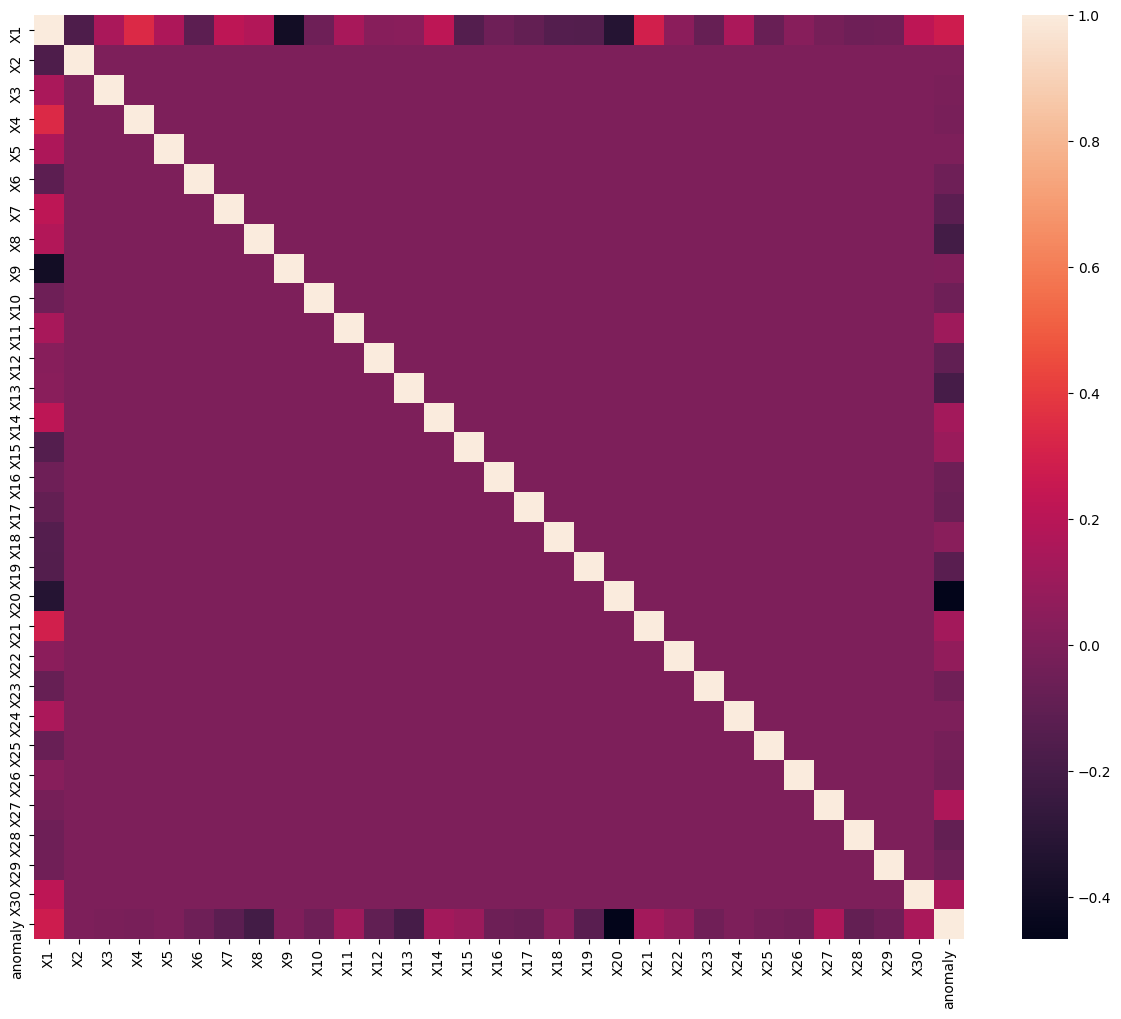

In [9]:
corr = data.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [10]:
display(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,anomaly
0,0.174300,0.438155,0.547325,0.783455,0.601152,0.736633,0.681003,0.741911,0.372806,0.700684,...,0.695744,0.799828,0.254200,0.749898,0.348312,0.760369,0.565051,0.692646,0.447460,0
1,0.156955,0.358103,0.547735,0.677705,0.653315,0.722129,0.755436,0.652081,0.356663,0.772700,...,0.700128,0.802984,0.259414,0.753954,0.344995,0.760152,0.566844,0.691325,0.447240,0
2,0.206479,0.318427,0.595435,0.672403,0.510233,0.628544,0.814642,0.717716,0.337463,0.747410,...,0.689706,0.797781,0.259913,0.749943,0.334245,0.760525,0.570651,0.694160,0.441232,0
3,0.206952,0.253134,0.604520,0.693263,0.739025,0.695075,0.834528,0.789217,0.484926,0.772054,...,0.692374,0.807418,0.255336,0.755779,0.348453,0.758146,0.565209,0.690263,0.447167,0
4,0.136466,0.408872,0.510549,0.594633,0.680964,0.783063,0.687105,0.753106,0.371015,0.723868,...,0.696328,0.793342,0.255085,0.745760,0.349749,0.759487,0.564032,0.688605,0.443426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.169158,0.346563,0.490988,0.730109,0.758500,0.759656,0.822570,0.835548,0.337855,0.724339,...,0.725434,0.861859,0.192823,0.722773,0.315938,0.786546,0.547354,0.677630,0.465195,0
283722,0.219229,0.276681,0.648578,0.651732,0.594341,0.696445,0.805675,0.743364,0.229752,0.732183,...,0.694778,0.800508,0.258489,0.760112,0.348768,0.760137,0.566589,0.693339,0.445904,0
283723,0.156108,0.511336,0.548357,0.711814,0.599294,0.727917,0.786589,0.720562,0.388221,0.708066,...,0.684779,0.812433,0.262825,0.774063,0.353548,0.760850,0.568776,0.693528,0.444779,0
283724,0.111818,0.417230,0.443910,0.770976,0.581679,0.878371,0.596461,0.787458,0.494214,0.680518,...,0.696702,0.805088,0.246890,0.756529,0.346597,0.763659,0.563915,0.689666,0.445348,0


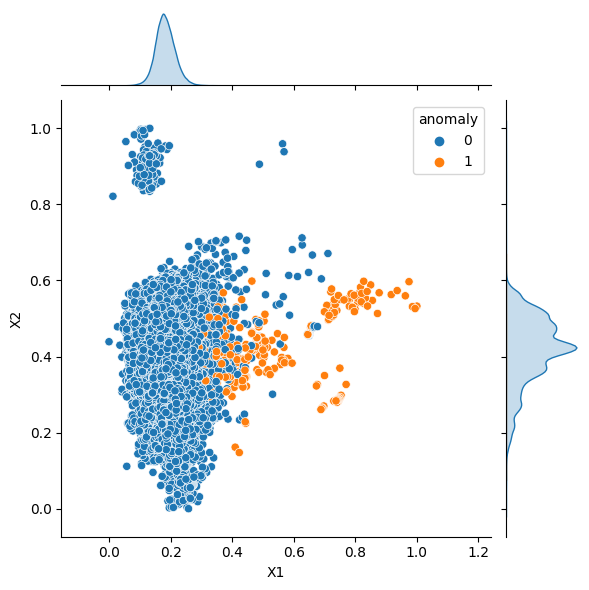

In [11]:
sns.jointplot(data = data, x="X1", y="X2", hue = "anomaly", kind='scatter')

In [13]:
data.anomaly.value_counts()

anomaly
0    283253
1       473
Name: count, dtype: int64

In [12]:
data.to_csv('../data/all_data.csv', index = False)